**Import libraries**

**Load the dataset and extract indpenedent and dependent variables**

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

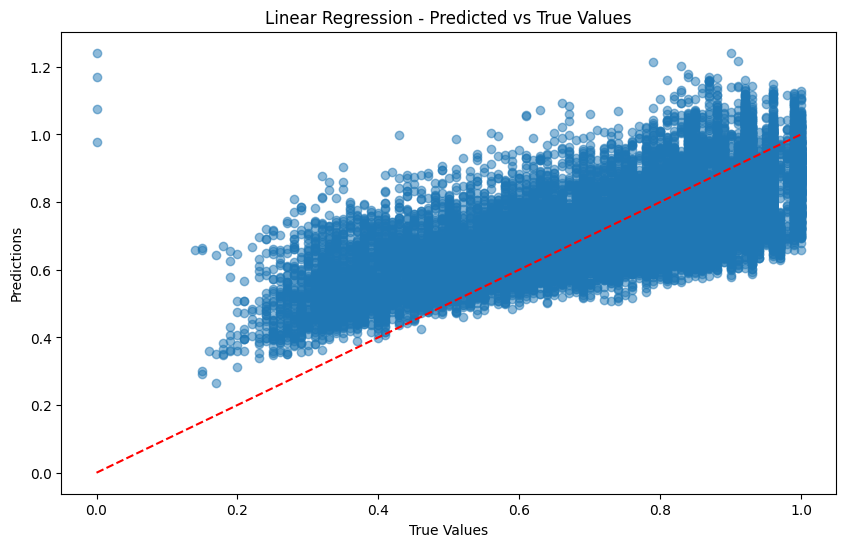

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('weatherHistory.csv')

# Display the first few rows of the dataset
print(data.head())

# Preprocessing
# Drop non-numeric columns (excluding the target 'humidity')
X = data.drop(columns=['Humidity', 'Formatted Date', 'Precip Type', 'Daily Summary', 'Summary'])
y = data['Humidity']

# Handle missing values if necessary
# For simplicity, we'll drop rows with missing values
X = X.dropna()
y = y[X.index]  # Keep only rows with corresponding target values

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plotting predicted vs true values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression - Predicted vs True Values')
plt.show()


## Conclusion


- **Type of Machine Learning Problem**: This is a regression problem, as we are predicting a continuous variable, the temperature.
- **Feature Relationships**: The correlation matrix shows the relationships between different numerical features and the target variable (Humidity).
- **Preprocessing Steps**: Included selecting numerical features, handling missing values, normalizing the data, and splitting into training and testing sets.
- **Model Selection**: A simple linear regression model was used, and its performance was evaluated using MSE and R2 score.
- **Evaluation Metrics**: The MSE and R2 score were used to evaluate the model's performance. A lower MSE and a higher R2 score indicate a better fit.
- **Predicted vs. True Values**: The plot shows the relationship between the predicted and true values, with a closer alignment indicating a better model.
